<a href="https://colab.research.google.com/github/wdconinc/practical-computing-for-scientists/blob/master/Lectures/lecture20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture #20

In [0]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import numpy.matlib as ml

## In our last episode

* 1st order ODEs
  * the forward Euler method to $\mathcal{O}(h^2)$ per step
  * the midpoint method, an improvement to $\mathcal{O}(h^3)$ per step

## Solving 1st order Ordinary Differential Equations (ODEs)

Find the function $y(t)$ that satisfies the ODE $ y'(t) = f(t, y) $ with initial conditions $y(0) = y_0$.

* Forward methods: starting from $y_0$, determine $y(t)$, with $t > 0$.
* Backward methods: starting from $y_0$, determine $y(t)$, with $t < 0$.

### Euler's method

Based on the Taylor expansion:
$$ y(t+h) = y(t) + h y'(t) + \mathcal{O}(h^2) $$
or based on the approximate definition of the derivative
$$ y'(t) = f(t, y) \approx \frac{y(t+h) - y(t)}{h} $$
we find the discretized expression
$$ y_{n+1} = y_n + h f(t, y_n) $$

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ee/Forward_Euler_method_illustration.png" width="400px">


The truncation error in Euler's method is due to the ignored second order term in the Taylor expansion of $y(t+h)$:
$$ E_{step} = \frac{1}{2} y''(t) h^2 = \mathcal{O}(h^2) $$
After $n$ integration steps this error has accumulated to
$$ E_{accum} = n E_{step} = \frac{t_n - t_0}{h} E_{step} = \mathcal{O}(h) $$

### Midpoint method

Instead of the derivative expression that gave us the Euler method, we can realize that this actually gives the derivative at $t + \frac{h}{2}$
$$ y'\big(t + \frac{h}{2}\big) = \frac{y(t+h) - y(t)}{h} $$

Then we find
$$ y'\big(t+\frac{h}{2}\big) = f\big(t+\frac{h}{2}, y(t+\frac{h}{2})\big) $$
and we can use the Taylor expansion for $y(t+\frac{h}{2}) = y(t) + \frac{h}{2} y'(t)$ to find
$$ y'\big(t+\frac{h}{2}\big) = f\big(t+\frac{h}{2},  y(t) + \frac{h}{2} f(t, y(t)\big) $$
so that
$$ y(t+h) = y(t) + h f\big(t+\frac{h}{2},  y(t) + \frac{h}{2} f(t, y(t)\big) $$

In discrete steps of $\frac{h}{2}$ this becomes
$$ y_{n+1} = y_n + h f\big(t+\frac{h}{2}, y_n + \frac{h}{2} f(t, y_n)\big) $$

<img src="https://upload.wikimedia.org/wikipedia/commons/3/39/Midpoint_method_illustration.png" width="400px">

Since the midpoint method is symmetric in time around the $t + \frac{h}{2}$ point, the error cannot be even in $h$. This means that the error must be of third order in $h$:
$$ E_{step} \propto h^3 = \mathcal{O}(h^3) $$
After $n$ integration steps this error has accumulated to
$$ E_{accum} = n E_{step} = \frac{t_n - t_0}{h} E_{step} = \mathcal{O}(h^2) $$

The midpoint method will therefore be more accurate than Newton's method.

### Runge-Kutta methods in general

Instead of truncating the Taylor series after the first derivative, we can keep additional terms
$$ y(t+h) = y(t) + h y'(t) + \frac{1}{2!} h^2 y''(t) + \ldots + \frac{1}{n!} h^n y^{(n)}(t) + \mathcal{O}(h^{n+1}) $$
However, this requires that we compute, numerically, additional derivatives and we know that that introduces numerical instability very quickly.

Instead, *Runge-Kutta methods* attempt to approximate $y(t+h)$ at higher orders without needing the additional integrals. In particular, we require
$$ y_{n+1} = y_{n} + h\sum_{i=1}^n b_i k_i $$
with
$$ k_1 = f\big(t + c_1 h, y\big) $$
$$ k_2 = f\big(t + c_2 h, y + h (a_{21} k_1)\big) $$
$$ k_3 = f\big(t + c_3 h, y + h (a_{31} k_1 + a_{32} k_2)\big) $$
$$ \mbox{etc}\ldots $$
with the following properties:
* The sum of the coefficients $b$ is 1: $\sum b_i = 1$.
* Almost always $c_1$ will be zero, which we do in the following.



### First order Runge-Kutta method (i.e. Euler's forward method)

For the first order Runge-Kutta method this becomes explicitly:
$$ y_{n+1} = y_{n} + h b_1 k_1 $$
with
$$ k_1 = f(t, y) $$
With $b_1 = 1$ this is identical to Euler's forward method.



In [0]:
def solve_rk1_euler(f, t, y0):
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(0, len(t) - 1):
        h = t[i+1] - t[i]
        b1 = 1
        k1 = f(y[i], t[i])
        y[i+1] = y[i] + h * b1 * k1
    return y

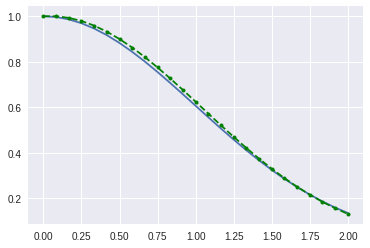

In [0]:
f1 = lambda y, t: -y*t
f1_exsol = lambda t: np.exp(-0.5*t**2)
t = np.linspace(0, 2, 25)
plt.plot(t,f1_exsol(t))
y0 = 1
y1_rk1_euler = solve_rk1_euler(f1, t, y0)
plt.plot(t, y1_rk1_euler, "--og", ms = 4)

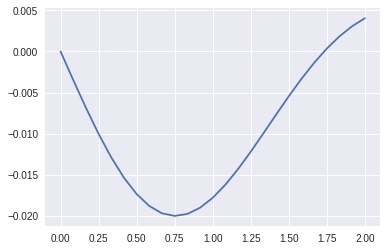

In [0]:
plt.plot(t, f1_exsol(t) - y1_rk1_euler)

### Second order Runge-Kutta methods

For the second order Runge-Kutta method this becomes explicitly:
$$ y_{n+1} = y_{n} + h (b_1 k_1 + b_2 k_2) $$
with
$$ k_1 = f\big(t_n, y_n\big) $$
$$ k_2 = f\big(t_n + c_2 h, y_n + h a_{21} k_1\big) $$

We must now determine the values for $b_1$, $b_2$, $c_2$ and $a_{21}$ such that this iterative expression returns the 'right' result. For the second order Runge-Kutta method we impose that the truncation error must be of $\mathcal{O}(h^3)$.

This means that in our Taylor expansion we will keep all terms up to the second derivative:
$$ y(t+h) = y(t) + h y'(t) + \frac{1}{2!} h^2 y''(t) + \mathcal{O}(h^3) $$
We can write the second derivative as
$$ \frac{d^2 y}{dt^2} = \frac{\partial f}{\partial t} + \frac{\partial f}{\partial y} \frac{dy}{dt} = \frac{\partial f}{\partial t} + \frac{\partial f}{\partial y} f $$
This means that our Taylor expansion is now
$$ y(t+h) = y(t) + h f(t,y) + \frac{1}{2!} h^2 \big(\frac{\partial f}{\partial t} + \frac{\partial f}{\partial y} f\big)(t,y) + \mathcal{O}(h^3) $$

Similarly we can expand the expression for $k_2$:
$$ k_2 = f(t_n,y_n) + c_2 h \frac{\partial f}{\partial t} (t_n,y_n) + h a_{21} k_1 \frac{\partial f}{\partial y} (t_n,y_n) + \mathcal{O}(h^2) \\ = f(t_n,y_n) + c_2 h \frac{\partial f}{\partial t} (t_n,y_n) + h a_{21} f(t,y) \frac{\partial f}{\partial y} (t_n,y_n) + \mathcal{O}(h^2) $$

If we plug this into the iterative expression we find:
$$ y_{n+1} = y_{n} + h b_1 f(t_n,y_n) + h b_2 \big( f(t_n,y_n) + c_2 h \frac{\partial f}{\partial t} (t_n,y_n) + h a_{21} f(t_n,y_n) \frac{\partial f}{\partial y} (t_n,y_n) \big) + \mathcal{O}(h^3) \\ = y_{n} + h (b_1 + b_2) f(t_n,y_n) + h^2 b_2 \big(c_2 \frac{\partial f}{\partial t} + a_{21} f \frac{\partial f}{\partial y} \big) (t_n,y_n) + \mathcal{O}(h^3) $$

For the Taylor expansion to be identical (up to $\mathcal{O}(h^3)$ terms) to the iterative approximation, we must have:
$$ \sum b_i = 1 $$
$$ b_2 c_2 = \frac{1}{2} $$
$$ b_2 a_{21} = \frac{1}{2} $$
These three equations don't uniquely constrain the four unknowns $b_1$, $b_2$, $c_2$ and $a_{21}$.


##### Midpoint method, (re)derived as RK2

We could choose
$$ b_1 = 0 $$
$$ b_2 = 1 $$
$$ c_2 = \frac{1}{2} $$
$$ a_{21} = \frac{1}{2} $$
and obtain
$$ y_{n+1} = y_{n} + h k_2 $$
with
$$ k_1 = f\big(t_n, y_n\big) $$
$$ k_2 = f\big(t_n + \frac{1}{2} h, y_n + \frac{1}{2} h k_1\big) $$
This is exactly what we derived before as the midpoint method.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/39/Midpoint_method_illustration.png" width="400px">

In [0]:
def solve_rk2_midpoint(f, t, y0):
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(0, len(t) - 1):
        h = t[i+1] - t[i]
        b1 = 0
        b2 = 1
        c2 = 0.5
        a21 = 0.5
        k1 = f(y[i], t[i])
        k2 = f(y[i] + h * a21 * k1, t[i] + c2 * h)
        y[i+1] = y[i] + h * b1 * k1 + h * b2 * k2
    return y

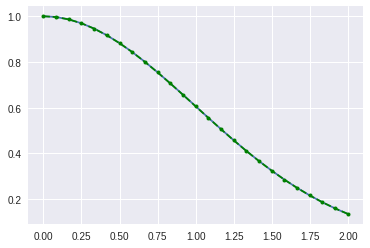

In [0]:
f1 = lambda y, t: -y*t
f1_exsol = lambda t: np.exp(-0.5*t**2)
t = np.linspace(0, 2, 25)
plt.plot(t,f1_exsol(t))
y0 = 1
y1_rk2_midpoint = solve_rk2_midpoint(f1, t, y0)
plt.plot(t, y1_rk2_midpoint, "--og", ms = 4)

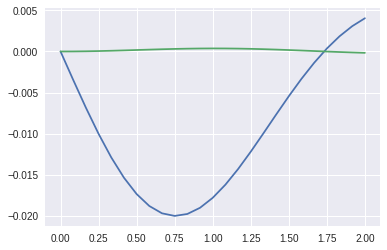

In [0]:
plt.plot(t, f1_exsol(t) - y1_rk1_euler, t, f1_exsol(t) - y1_rk2_midpoint)

##### Heun's method, derived as RK2

Or, we could choose
$$ b_1 = \frac{1}{2} $$
$$ b_2 = \frac{1}{2} $$
$$ c_2 = 1 $$
$$ a_{21} = 1 $$
and obtain
$$ y_{n+1} = y_{n} + h \frac{k_1 + k_2}{2} $$
with
$$ k_1 = f\big(t_n, y_n\big) $$
$$ k_2 = f\big(t_n + h, y_n + h k_1\big) $$
This is Heun's method.

<img src="https://upload.wikimedia.org/wikipedia/commons/5/52/Heun%27s_Method_Diagram.jpg" width="400px">

In [0]:
def solve_rk2_heun(f, t, y0):
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(0, len(t) - 1):
        h = t[i+1] - t[i]
        b1 = 0.5
        b2 = 0.5
        c2 = 1
        a21 = 1
        k1 = f(y[i], t[i])
        k2 = f(y[i] + h * a21 * k1, t[i] + c2 * h)
        y[i+1] = y[i] + h * b1 * k1 + h * b2 * k2
    return y

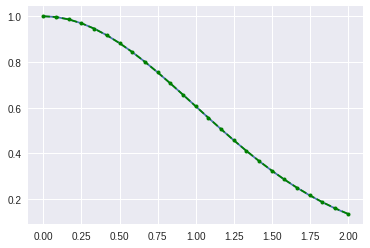

In [0]:
f1 = lambda y, t: -y*t
f1_exsol = lambda t: np.exp(-0.5*t**2)
t = np.linspace(0, 2, 25)
plt.plot(t,f1_exsol(t))
y0 = 1
y1_rk2_heun = solve_rk2_heun(f1, t, y0)
plt.plot(t, y1_rk2_heun, "--og", ms = 4)

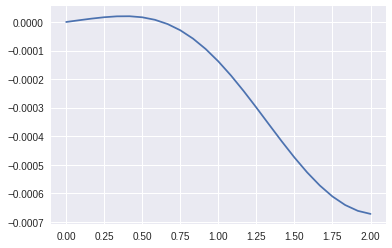

In [0]:
plt.plot(t, f1_exsol(t) - y1_rk2_heun)

##### Ralston's method, derived as RK2

Or, we could choose
$$ b_1 = \frac{1}{4} $$
$$ b_2 = \frac{3}{4} $$
$$ c_2 = \frac{2}{3} $$
$$ a_{21} = \frac{2}{3} $$
and obtain
$$ y_{n+1} = y_{n} + h \frac{k_1 + 3 k_2}{4} $$
with
$$ k_1 = f\big(t_n, y_n\big) $$
$$ k_2 = f\big(t_n + \frac{2}{3} h, y_n + \frac{2}{3} h k_1\big) $$
This is Ralston's method.


In [0]:
def solve_rk2_ralston(f, t, y0):
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(0, len(t) - 1):
        h = t[i+1] - t[i]
        b1 = 1/4
        b2 = 3/4
        c2 = 2/3
        a21 = 2/3
        k1 = f(y[i], t[i])
        k2 = f(y[i] + h * a21 * k1, t[i] + c2 * h)
        y[i+1] = y[i] + h * b1 * k1 + h * b2 * k2
    return y

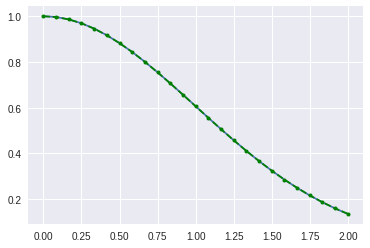

In [0]:
f1 = lambda y, t: -y*t
f1_exsol = lambda t: np.exp(-0.5*t**2)
t = np.linspace(0, 2, 25)
plt.plot(t,f1_exsol(t))
y0 = 1
y1_rk2_ralston = solve_rk2_ralston(f1, t, y0)
plt.plot(t, y1_rk2_ralston, "--og", ms = 4)

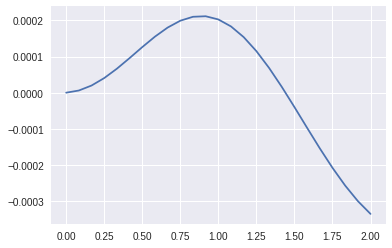

In [0]:
plt.plot(t, f1_exsol(t) - y1_rk2_ralston)

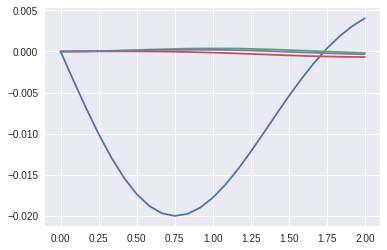

In [0]:
plt.plot(t, f1_exsol(t) - y1_rk1_euler, t, f1_exsol(t) - y1_rk2_midpoint, t, f1_exsol(t) - y1_rk2_heun, t, f1_exsol(t) - y1_rk2_ralston)

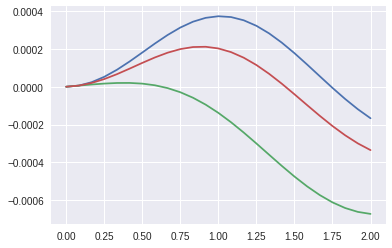

In [0]:
plt.plot(t, f1_exsol(t) - y1_rk2_midpoint, t, f1_exsol(t) - y1_rk2_heun, t, f1_exsol(t) - y1_rk2_ralston)

### Fourth order Runge-Kutta

Now that we know how to derive the general Runge-Kutta methods, we could (given enough time) derive the most commonly used Runge-Kutta method of 4th order. This method has a truncation error of $\mathcal{O}(h^5)$ per step.
￼
For the 4th order Runge-Kutta method we use:
$$ b_1 = \frac{1}{6} \quad b_2 = \frac{1}{3} \quad b_3 = \frac{1}{3} \quad b_4 = \frac{1}{6} $$
$$ c_2 = \frac{1}{2} \quad c_3 = \frac{1}{2} \quad c_4 = 1 $$
$$ a_{21} = \frac{1}{2} \quad a_{32} = \frac{1}{2} \quad a_{43} = 1 $$

<img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Runge-Kutta_slopes.svg" width="400"/>

In [0]:
def solve_rk4(f, t, y0):
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(0, len(t) - 1):
        h = t[i+1] - t[i]
        k1 = h*f(y[i], t[i])
        k2 = h*f(y[i] + k1/2, t[i] + h/2)
        k3 = h*f(y[i] + k2/2, t[i] + h/2)
        k4 = h*f(y[i] + k3, t[i] + h)
        y[i+1] = y[i] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

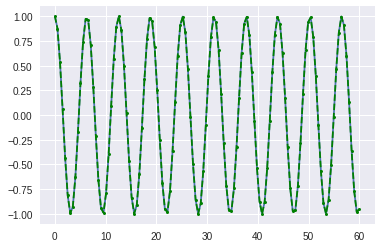

In [0]:
f2 = lambda y,t: -np.sin(t)
f2_exact = lambda t: np.cos(t)
y0 = 1
t = np.linspace(0,60,120)
plt.plot(t, f2_exact(t))
Y2solution = solve_rk4(f2, t, y0)
plt.plot(t, Y2solution, '--og', ms = 3)

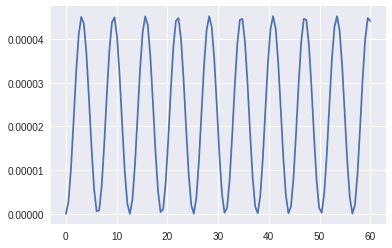

In [0]:
plt.plot(t, f2_exact(t) - Y2solution)

Once again there are other options for the coefficients of the 4th order Runge-Kutta method (though the previous once are most often used). The choice below is 3/8 version of the 4th order Runge-Kutta method.

At the expense of additional function evaluations we can reduce the truncation error a bit further. In this case we are beating down the coefficients of $h^5$ in the $\mathcal{O}(h^5)$ terms.

In [0]:
def solve_rk4_modified(f, t, y0):
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(0, len(t) - 1):
        h = t[i+1] - t[i]
        k1 = h*f(y[i], t[i])
        k2 = h*f(y[i] + k1/3, t[i] + 1/3*h)
        k3 = h*f(y[i] - k1/3 + k2, t[i] + 2/3*h)
        k4 = h*f(y[i] + k1 - k2 + k3, t[i] + h)
        y[i+1] = y[i] + 1/8 * (k1 + 3*k2 + 3*k3 + k4)
    return y

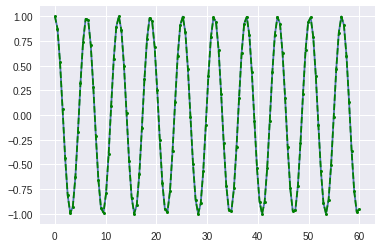

In [0]:
f2 = lambda y,t: -np.sin(t)
f2_exact = lambda t: np.cos(t)
y0 = 1
t = np.linspace(0,60,120)
plt.plot(t, f2_exact(t))
Y2solution_modified = solve_rk4_modified(f2, t, y0)
plt.plot(t, Y2solution_modified, '--og', ms = 3)

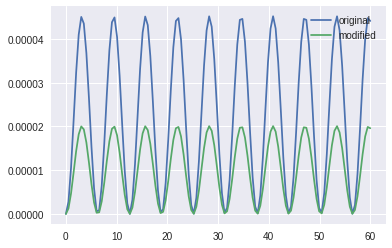

In [0]:
plt.plot(t, f2_exact(t) - Y2solution, t, f2_exact(t) - Y2solution_modified)
plt.legend(['original', 'modified'])

## Modeling population growth

In 1938 Verhulst developed a model of ecological population growth that uses the following differential equation:
$$ \frac{dN}{dt} = r N (1 - \frac{N}{K}) $$
with $r$ the growth rate and $K$ the carrying capacity (maximum population size of the species that the environment can sustain indefinitely).

The exact solution of this differential is the logistic function:
$$ N(t) = \frac{K N_0 e^{rt}}{K + N_0 (e^{rt} - 1)} $$

As you can see, at time $t = 0$ the population is $N(t = 0) = N_0$. At time $t \to \infty$ the population becomes $N(t \to \infty) = K$.

In the example below we start with a very small population. The species can grow exponentially with growth rate $r$. At some point, however, it starts to be limited by the environment (not enough food). Then the population reaches it asymptotically stable population level at the carrying capacity $K$.

In [0]:
N0 = 0.001

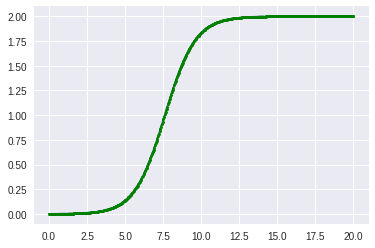

In [0]:
r = 1
K = 2
f = lambda N, t: r * N * (1 - N / K)

N_exact = lambda t: K * N0 * np.exp(r * t) / (K + N0 * (np.exp(r*t) - 1))

t = np.linspace(0, 20, 400)
N_solution = solve_rk4(f, t, N0)
plt.plot(t, N_exact(t))
plt.plot(t, N_solution, '--og', ms = 3)

Ok, there's an analytical solution for constant $K$ but this is often the carrying capacity is periodic: in the winter there may not be as much food to sustain a population. How do we model this?

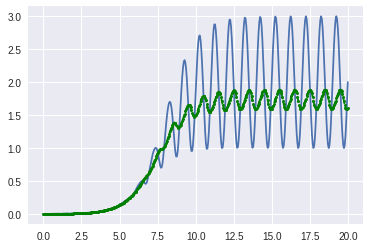

In [0]:
K = lambda t: 2 + np.sin(2*math.pi*t)
f = lambda N, t: r * N * (1 - N / K(t))

N_wrong = lambda t: K(t) * N0 * np.exp(r * t) / (K(t) + N0 * (np.exp(r*t) - 1))

t = np.linspace(0, 20, 400)
N_solution = solve_rk4(f, t, N0)
plt.plot(t, N_wrong(t))
plt.plot(t, N_solution, '--og', ms = 3)

It also makes sense to modify the growth rate. When the population is small and spread out, the growth rate may be smaller than when the population is dense and there are many contacts.

(0, 3)

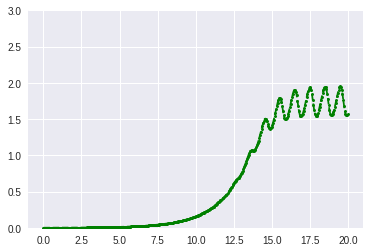

In [0]:
r = lambda N: 0.5 + N / 2 # normalized by average K
K = lambda t: 2 + np.sin(2*math.pi*t)
f = lambda N, t: r(N) * N * (1 - N / K(t))

t = np.linspace(0, 20, 400)
N_solution = solve_rk4(f, t, N0)
plt.plot(t, N_solution, '--og', ms = 3)
plt.ylim(0, 3)